# 1. sklearn datasets and matplotlib practice

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

%matplotlib inline

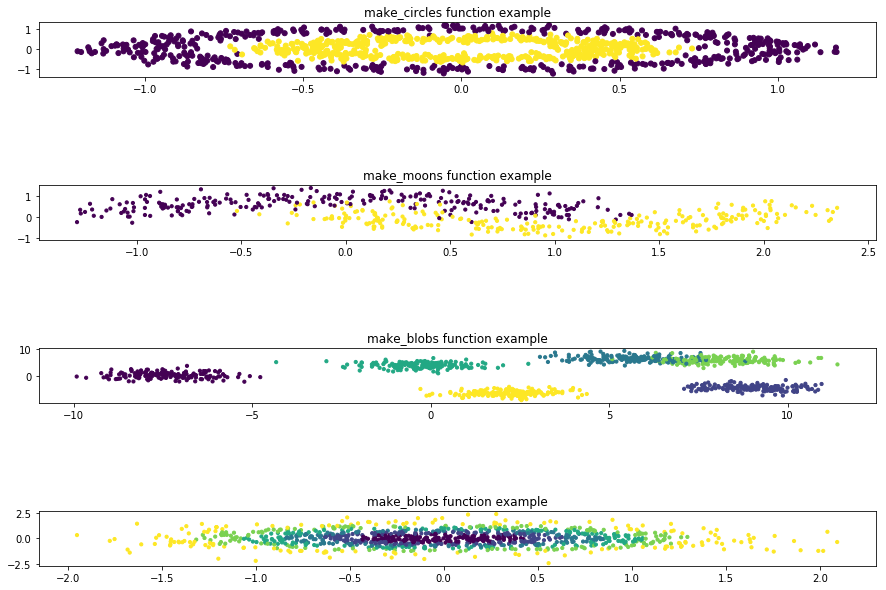

In [101]:
fig = plt.figure(1)
x1, y1 = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.subplot(411)
plt.title('make_circles function example')
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c=y1, s=25)

plt.subplot(412)
x2, y2 = make_moons(n_samples=500, noise=0.2)
plt.title('make_moons function example')
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=10)

plt.subplot(413)
x3, y3 = make_blobs(n_samples=1000, n_features=2, centers=6)
plt.title('make_blobs function example')
plt.scatter(x3[:, 0], x3[:, 1], c=y3, s=10)

plt.subplot(414)
x4, y4 = make_gaussian_quantiles(n_samples=1000, cov=0.5, n_features=2, n_classes=6, shuffle=True)
plt.title('make_blobs function example')
plt.scatter(x4[:, 0], x4[:, 1], c=y4, s=10)

plt.subplots_adjust(hspace=2)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

np.r_ and np.c_ usage

In [106]:
a = np.array([[11,12,13],
              [14,15,16]])
b = np.array([[21,22,23],
              [24,25,26]])

In [107]:
np.r_[a, b]  # stack the two matrix in the row direction

array([[11, 12, 13],
       [14, 15, 16],
       [21, 22, 23],
       [24, 25, 26]])

In [108]:
np.c_[a, b] # stack the two matrix in the column direction

array([[11, 12, 13, 21, 22, 23],
       [14, 15, 16, 24, 25, 26]])

# 2. np.array copy

In [141]:
a = np.array([list([1]), list([2, 3]), list([4])])
b = np.array(a, copy=True)   # deep copy

a is b

False

In [144]:
a = np.array([list([1]), list([2, 3]), list([4])])
b = np.array(a, copy=False)  # shallow copy

a is b

True

# 3. Pandas Practice

In [145]:
import pandas as pd

In [179]:
df = pd.read_csv('uk_rain_2014.csv', header=0)
df.head(5)

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [180]:
df.tail(5)

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
28,2008/09,1139,4941,268,6690,323,3189
29,2009/10,1103,4738,255,6435,244,1958
30,2010/11,1053,4521,265,6593,267,2885
31,2011/12,1285,5500,339,7630,379,5261
32,2012/13,1090,5329,350,9615,187,1797


In [181]:
df.columns = ['water_year','rain_octsep', 'outflow_octsep',
              'rain_decfeb', 'outflow_decfeb', 'rain_junaug', 'outflow_junaug']
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [182]:
len(df)

33

In [183]:
df['rain_octsep']   # extract rain_octsep column

0     1182
1     1098
2     1156
3      993
4     1182
5     1027
6     1151
7     1210
8      976
9     1130
10    1022
11    1151
12    1130
13    1162
14    1110
15     856
16    1047
17    1169
18    1268
19    1204
20    1239
21    1185
22    1021
23    1165
24    1095
25    1046
26    1387
27    1225
28    1139
29    1103
30    1053
31    1285
32    1090
Name: rain_octsep, dtype: int64

In [184]:
df.rain_octsep < 1000  # filter by rain_octsep column

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
Name: rain_octsep, dtype: bool

In [185]:
df[df.rain_octsep < 1000]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
3,1983/84,993,4265,391,8905,141,1078
8,1988/89,976,4330,309,6465,200,1440
15,1995/96,856,3479,245,5515,172,1439


In [186]:
df[(df.rain_octsep < 1000) & (df.outflow_octsep < 4000)] # note: we can not use and, have to use &

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
15,1995/96,856,3479,245,5515,172,1439


In [187]:
df[df.water_year.str.startswith('199')] # filter by string methods

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
10,1990/91,1022,4418,305,7120,216,1923
11,1991/92,1151,4506,246,5493,280,2118
12,1992/93,1130,5246,308,8751,219,2551
13,1993/94,1162,5583,422,10109,193,1638
14,1994/95,1110,5370,484,11486,103,1231
15,1995/96,856,3479,245,5515,172,1439
16,1996/97,1047,4019,258,5770,256,2102
17,1997/98,1169,4953,341,7747,285,3206
18,1998/99,1268,5824,360,8771,225,2240
19,1999/00,1204,5665,417,10021,197,2166


In [188]:
df.iloc[30]   # pandas also has row index

water_year        2010/11
rain_octsep          1053
outflow_octsep       4521
rain_decfeb           265
outflow_decfeb       6593
rain_junaug           267
outflow_junaug       2885
Name: 30, dtype: object

In [189]:
reindexed_df = df.set_index(['water_year']) # use water_year as the row index

In [191]:
reindexed_df.head()

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
1980/81,1182,5408,292,7248,174,2212
1981/82,1098,5112,257,7316,242,1936
1982/83,1156,5701,330,8567,124,1802
1983/84,993,4265,391,8905,141,1078
1984/85,1182,5364,217,5813,343,4313


In [193]:
reindexed_df.loc['2000/01']   # loc allows us to use string as the index

rain_octsep       1239
outflow_octsep    6092
rain_decfeb        328
outflow_decfeb    9347
rain_junaug        236
outflow_junaug    2142
Name: 2000/01, dtype: int64

In [197]:
reindexed_df.sort_index(ascending=False).head() # sort the data by index

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
2012/13,1090,5329,350,9615,187,1797
2011/12,1285,5500,339,7630,379,5261
2010/11,1053,4521,265,6593,267,2885
2009/10,1103,4738,255,6435,244,1958
2008/09,1139,4941,268,6690,323,3189


In [199]:
default_index_df = reindexed_df.reset_index('water_year')  # remove the water_year index
default_index_df.head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [202]:
# apply a function to the column
def base_year(year):
    base_year = year[:4]
    base_year = pd.to_datetime(base_year).year
    return base_year

df['year'] = df.water_year.apply(base_year)
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
0,1980/81,1182,5408,292,7248,174,2212,1980
1,1981/82,1098,5112,257,7316,242,1936,1981
2,1982/83,1156,5701,330,8567,124,1802,1982
3,1983/84,993,4265,391,8905,141,1078,1983
4,1984/85,1182,5364,217,5813,343,4313,1984


In [208]:
# groupby column, need to apply a aggregatioin function
groupby_df = df.groupby(df.year // 10* 10).max()
groupby_df.head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
year,,,,,,,,
1980,1989/90,1210,5701,470,10520,343,4313,1989
1990,1999/00,1268,5824,484,11486,285,3206,1999
2000,2009/10,1387,6391,437,10926,357,5168,2009
2010,2012/13,1285,5500,350,9615,379,5261,2012


In [211]:
groupby_df = df.groupby(df.year // 10* 10).min()
groupby_df.head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
year,,,,,,,,
1980,1980/81,976,4265,217,5813,124,1078,1980
1990,1990/91,856,3479,245,5493,103,1231,1990
2000,2000/01,1021,4059,206,4578,176,1474,2000
2010,2010/11,1053,4521,265,6593,187,1797,2010


In [212]:
groupby_df = df.groupby(df.year // 10* 10).sum()
groupby_df.head()

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
year,,,,,,,
1980,11105,50912,3208,78834,2223,23096,19845
1990,11119,49063,3386,80783,2146,20614,19945
2000,11605,50308,3189,78121,2635,26859,20045
2010,3428,15350,954,23838,833,9943,6033


In [223]:
# Grouping by multiple columns (year and rain)
# Grouping by multiple columns
decade_rain = df.groupby([
                    df.year // 10 * 10, 
                    df.rain_octsep // 1000 * 1000])[[
                'outflow_octsep',
                'outflow_decfeb', 
                'outflow_junaug']].mean()
decade_rain

outflow_octsep  outflow_decfeb  outflow_junaug
year rain_octsep                                                
1980 0               4297.500000     7685.000000     1259.000000
     1000            5289.625000     7933.000000     2572.250000
1990 0               3479.000000     5515.000000     1439.000000
     1000            5064.888889     8363.111111     2130.555556
2000 1000            5030.800000     7812.100000     2685.900000
2010 1000            5116.666667     7946.000000     3314.333333

In [227]:
decade_rain = df.groupby([
                    df.rain_octsep // 1000 * 1000,
                    df.year // 10 * 10])[[
                'outflow_octsep',
                'outflow_decfeb', 
                'outflow_junaug']].mean()
decade_rain

outflow_octsep  outflow_decfeb  outflow_junaug
rain_octsep year                                                
0           1980     4297.500000     7685.000000     1259.000000
            1990     3479.000000     5515.000000     1439.000000
1000        1980     5289.625000     7933.000000     2572.250000
            1990     5064.888889     8363.111111     2130.555556
            2000     5030.800000     7812.100000     2685.900000
            2010     5116.666667     7946.000000     3314.333333

In [243]:
rain_jpn = pd.read_csv('jp_rain_2014.csv')
rain_jpn.columns = ['year', 'jpn_rainfall']
uk_jpn_rain = df.merge(rain_jpn, on='year')
uk_jpn_rain.head()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year,jpn_rainfall
0,1980/81,1182,5408,292,7248,174,2212,1980,1182
1,1981/82,1098,5112,257,7316,242,1936,1981,1098
2,1982/83,1156,5701,330,8567,124,1802,1982,1156
3,1983/84,993,4265,391,8905,141,1078,1983,993
4,1984/85,1182,5364,217,5813,343,4313,1984,1182


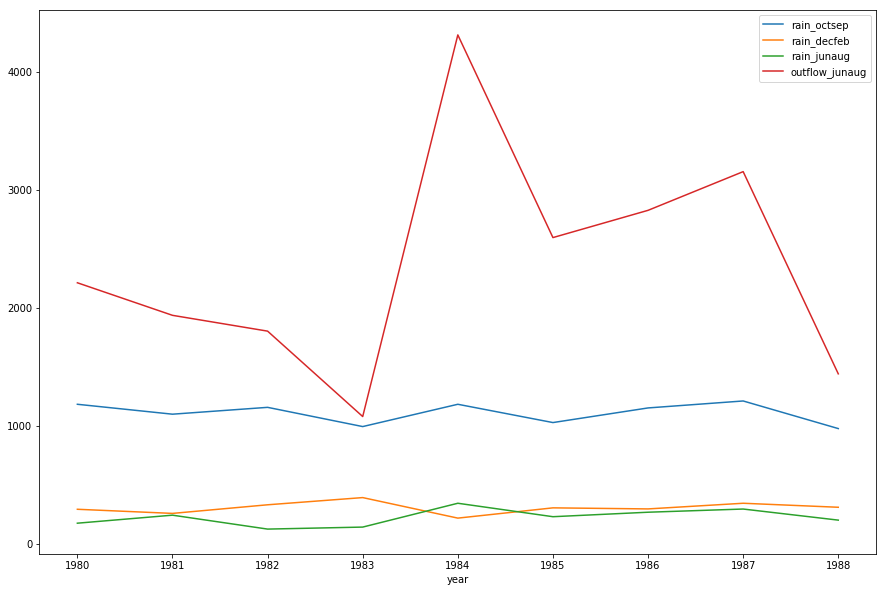

In [251]:
# Using pandas to quickly plot graphs
uk_jpn_rain.plot(x='year', y=['rain_octsep', 
                              'rain_decfeb', 
                              'rain_junaug', 
                              'outflow_junaug'])


In [252]:
df.to_csv('my_rain_data.csv')